# **Artificial Intelligence & Storytelling - Coursework 1**

This documents contains all the instructions for completing Coursework 1 of Artificial Intelligence & Storytelling (AIST). Submission will be done on the course's Learn page, where you will also find the submission and feedback dates. You need to submit a downloaded copy of this notebook filled in, as well as a copy of any image files you brought from outside the notebook (this is relevant in Exercise A - Act 2). If you have improvised in some way (where the coursework allows it) and used further external media, these should also be uploaded with the submission.

To download a copy of your notebook go Download -> Download .ipnyb (not the .py option). Make sure all your outputs are saved on your copy. To be sure, go File -> Upload notebook to upload your copy to Colab and check you are submitting the version you want for the coursework.

Don't forget to change the runtime type to GPU, from the menu Runtime -> Change runtime type. With a GPU active, running the whole notebook (Runtime -> Run all) for the first time will take about 5 minutes (though you need to be available for responding to some prompts). If you forget to change to GPU, or Google happens to not have any available at the moment, and you run on a CPU, than the same process would take about 40 minutes. 

Note, that though text outputs are consistent, and you won't get different results for the same input each time you run something, results can differ between runtimes for image generation. This just has to do with how the randomisation is happening. Avoid losing work you like by making sure you download copies of the notebook as backups (Download-> Download .ipnyb), and be careful when rerunning cells where you are happy with the output, as you might lose the previous output if you have not saved a copy.

**Experiment freely, and submit something even if it doesn't work. Partial solutions are awarded credit.**

**Reach out on available course channels for technical help on any aspect of the coursework, or for clarifications.**

**Further details on what may be discussed openly will be explained on a Learn Discussion thread on Coursework 1.**

In [ ]:
#@title Install required packages
#@markdown Run this first so that we can configure the notebook to have our code available.
!pip install git+https://github.com/pkage/ai-storytelling-backstage.git#subdirectory=code/

from aist.common import is_gpu_available


print(f'GPU is {"" if is_gpu_available() else "NOT "}available on this instance.')

import os
from PIL import Image
from aist import image
from google.colab import files
from aist.common import render_output_text
from IPython.display import display

from aist import text

def get_concat_h_blank(im1, im2, color=(0, 0, 0)):
    dst = Image.new('RGB', (im1.width + im2.width, max(im1.height, im2.height)), color)
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

#@markdown ***Do not edit these parameters.***
MODEL  = 'medium'
SEED        = 0
MAX_LENGTH  = 200
NUM_RETURN_SEQUENCES = 1
RENDER = True

NUM_BEAMS = 4

QA_MODEL  = 'deepset/roberta-base-squad2'

SUMM_MODEL = 'facebook/bart-large-cnn'
MIN_LENGTH = 30

SA_MODEL = 'distilbert-base-uncased-finetuned-sst-2-english'

FIB_MODEL = 'bert-base-uncased'

#@markdown Click the run button to the left to start! Or, double-click the cell to see the code.

## **Exercise A - Guided Story Generation**

[Marks 85/100]

Collaboration with one or more Artificial Intelligence (AI) systems or models can take many forms. For example, selecting from or currating AI outputs or instructing an AI to generate stories with specific qualities.

AIST's central theme focusses on the use of AI as a source of informed randomness and creative constraints. From that perspective, the practitioner of AI-Collaborative storytelling mixes control-over with adaptability-to the outputs of the AI. This is similar to how a painter understands how to use a brush but must adapt to their strokes transforming the canvas, bringing the results in line with their vision or adapting their vision to align with the results.

Excercise A sets you on the task of creating a 3-arc story along the lines of what is described in [Into the Woods, Chapter 2]. You will do so by guiding the AI tools provided with the course in generating a consistent story. Each part below focusses on one of the 3 arcs, and asks you to use different tools in order to generate the needed content.

Each of the parts is evaluated separately, but that evaluation is tied to the story so far. For example, the 1st arc will have you identify a protagonist. That protagonist will have to be carried on to the other two arcs. You will not generally be able to do everything in one pass, and are expected to go back and forth between the arcs, adjusting your prompts based on what you have come across so far. Playing with the prompts and outputs in this way is intended to be your main course activity, so Exercise A serves also as a constrained playing field for you to improve on this skill.

Each arc will specify the tools to be used, and the goals that need to be met by the generated text. It is important to highlight that the goals need to be met by the **generated** text, not by your input text/prompt (note that the generated text will typically add your prompt to its beginning; that beginning will of course not count as generated text).

You will be provided with cells to explain how your generated text meets the relevant goal. This information will be used in the marking and should be filled out. This is to highlight that the meaning of the text stems from the author. You will have limited characters to add such an explanation though, in order to ensure the rationalisation is not too forced and that the generated text is significant to the story.

Try to keep all prompts and explanations to max 150 characters. There are no such constraints for the size of any images. To help you quickly count the number of characters in a string, I have added the cell below:

In [ ]:
#@title Measure the length of a string of characters
PROMPT = "The sky was a questionable grey-blue. Almost like it didn't want a sandwich. Good. I only had one." #@param {type: 'string'}

#@markdown Click the run button to the left to start! Or, double-click the cell to see the code.

length = len(PROMPT)
print("This string has a length of " + str(length) + " characters.")

This string has a length of 98 characters.


In terms of marking, a reasonable attempt at each arc, including some explanation, awards a passing mark 50% [Mark 43/85]. Meeting the goals for each arc with a passable explanation, and all prompts and explanations under the 150 character limit, awards merit 65% [Mark 56/85]. Each arc will describe some possibilities for distinction, though I am open to being surprised (this is in line with the University marking scheme). More details are provided per question.

Each AI tool has a number of parameters that can be changed, such as the number of characters in the output, or how many samples are generated. All these are set in the "Install remaining packages cell" at the start of this notebook, and should not be edited for this coursework, in the interest of fairness in evaluation.

Example solutions are provided for each exercise [examples are for mark of merit, and I provide examples for distinction at some points]. You should replace these with your own solutions.

# Arc 1 - Set Up [Thesis]
[Marks 30/85]

Where the stage is set for our story. You will be identifying a protagonist and their main 3 traits, as well as an antagonist. Neither has to be a person. Animals, robots, abstract concepts, etc. are all acceptable as long as you can support it with your explanation.

**General Hint:** Don't be too concerned about not all the generated text aligning with the story you have in mind. Simply pick out those parts the question asks for or you wish to consider as part of the story.

In [ ]:
#@title Who is the protagonist? Generate text by continuing from your prompt.
PROMPT = 'It was mid-December, and the ravens were crowing loudly.' #@param {type: 'string'}

#@markdown Click the run button to the left to start! Or, double-click the cell to see the code.

text.text_generation(
    PROMPT,
    model=MODEL,
    seed=SEED,
    num_return_sequences=NUM_RETURN_SEQUENCES,
    render=RENDER
)

Sample 1:

> It was mid-December, and the ravens were crowing loudly. The raven was holding its head high until a loud sound of laughter and glee broke through the atmosphere.

> 

> "Now please tell me more about how I arrived."

> 

> This was what my name was.

> 

> In addition to being good at speaking language that I only learned by observation, I also learned by a very simple task.

> 

> I took out a red pencil and drew up a picture. I sketched a number that had been written down, and I would show the readers.

> 

> In a moment, I had completed the picture and set it down in the corner of my notebook. I left it on the table.

> 

> It felt very nice, and as expected my friends and I were enjoying it.

> 

> "Wow! Good morning everyone. What has me been up to, I really hope you will say a bit more about yourself and your personality…?"

> 

> It was a



Explanation: Identify the protagonist in the generated text above.

*Your answer here.* 

*Example explanation: The protagonist is "Now please tell me more about how I arrived." or "Ari" for short.*

In [ ]:
#@title What are the protagonists 3 key traits? Generate text by continuing from your prompt.
PROMPT = 'Ari loved drawing!' #@param {type: 'string'}

#@markdown Click the run button to the left to start! Or, double-click the cell to see the code.

text.text_generation(
    PROMPT,
    model=MODEL,
    seed=SEED,
    num_return_sequences=NUM_RETURN_SEQUENCES,
    render=RENDER
)

Sample 1:

> Ari loved drawing! His art was so perfect! I felt his hand on my back and said "Thank you"!!! And I'm very glad to tell you that the art I made was so fabulous!!! I couldn't be happier. I have made so many things myself and I will continue to do everything I can to make it a great place for my child. Thank you again!!

> 

> Lovely artwork! I bought this for her as her first anniversary gift and I have found my new favorite part. She enjoyed making a drawing and I'm always so happy when she gives me a new one. You really are my hero. I know who you are…my one true love in this wonderful world of art. Thank you and I will keep sharing this with those who have loved every inch of it.

> 

> Best gift ever!!! I purchased this as a birthday present for my daughter and I didn't know there were so many new things. The craftsmanship is amazing!!! The illustrations are simple



Explanation: Identify the protagonist's 3 key traits from both generated texts above. For a distinction, try to make at least some of these traits be apparent in both generated texts above (this one, and the one introducing the protagonist).

*Your answer here.*

*Example explanation: Ari was creative ("art was so perfect"), helpful (narrator is thanking them), and handy (can craft things).*

OR 

(distinction, because it draws from both generated texts) *Ari was creative ("art perfect", "drew picture"), helpful (narrator thanks them, asks about people), and handy (can craft things).*

In [ ]:
#@title Who or What is the antagonist? Generate text by continuing from your prompt.
PROMPT = "Ari didn't only have friends" #@param {type: 'string'}

#@markdown Click the run button to the left to start! Or, double-click the cell to see the code.

text.text_generation(
    PROMPT,
    model=MODEL,
    seed=SEED,
    num_return_sequences=NUM_RETURN_SEQUENCES,
    render=RENDER
)

Sample 1:

> Ari didn't only have friends. His girlfriend, Marlie, was his best friend, and they were going through the same thing. This was going to be a huge deal and I figured out this time just how different my personal space would look from any other real place I'd ever been. I started my research and found this little spot by a parking lot of my office building and on the floor it looked like this is a huge room, with more furniture than I had ever seen in my life and I was really excited. I started looking around the office and seeing what I had found. I found a few very good stores selling furniture, books, makeup products…and one of the first things I found was the bookstore on the front desk where Mrs. Hirsch has her books made from scratch.

> 

> I thought to myself, I have never owned a book before in my life and I didn't know there were any books in there. The first time I came up with this



Explanation: Identify the antagonist. For a distinction, try to give some indication of the antagonist's motives or what makes them an obstacle. Even better if it relates to the protagonist's traits in some way.

*Your answer here.* 

*Example explanation: needs to buy a book*

OR

(distinction, because it ties the antagonist (lack of motivation to buy a book) with the description of the character (art), and goes beyond the superficial to clarify what the problem really is. No right and wrong here, as long as you can tie it to the generated text.) *never owned a book -> Is unable to invest to anything but art, because they need praise. Needs to develop internal motivation.*

## Explanation - Wrapping up Act 1: Identify the Inciting Incident from anywhere in Act 1's generated text.

*Your answer here.*

Example explanation: *Ari walks into the bookstore (and feels the first stirring of a deeply hidden fear).*

# Arc 2 - Confrontation [Antithesis]
[Marks 30/85]

Where our protagonist confronts the anatagonist. You will use your own image (which you photographed, drew, googled, etc.) as a starting image. Write a text prompt below to guide the transformation of that image (which you will upload after clicking run). The transformed image should resemble the main action you want to take place in this 2nd arc. You will then caption that image, trying to glimpse some further details of the events taking place.

## Find an image showing the start of the protagonist's confrontation with the antagonist. You can get this image from anywhere you want. Draw it, take a photograph, Google an image, or anything else. You will use this image as input to the cell below.

*Add a comment here about where you found your image, or how you created it.*

Saving the-two-sisters-of-the-artist-reading-a-book-constantin-hansen.jpg to the-two-sisters-of-the-artist-reading-a-book-constantin-hansen.jpg


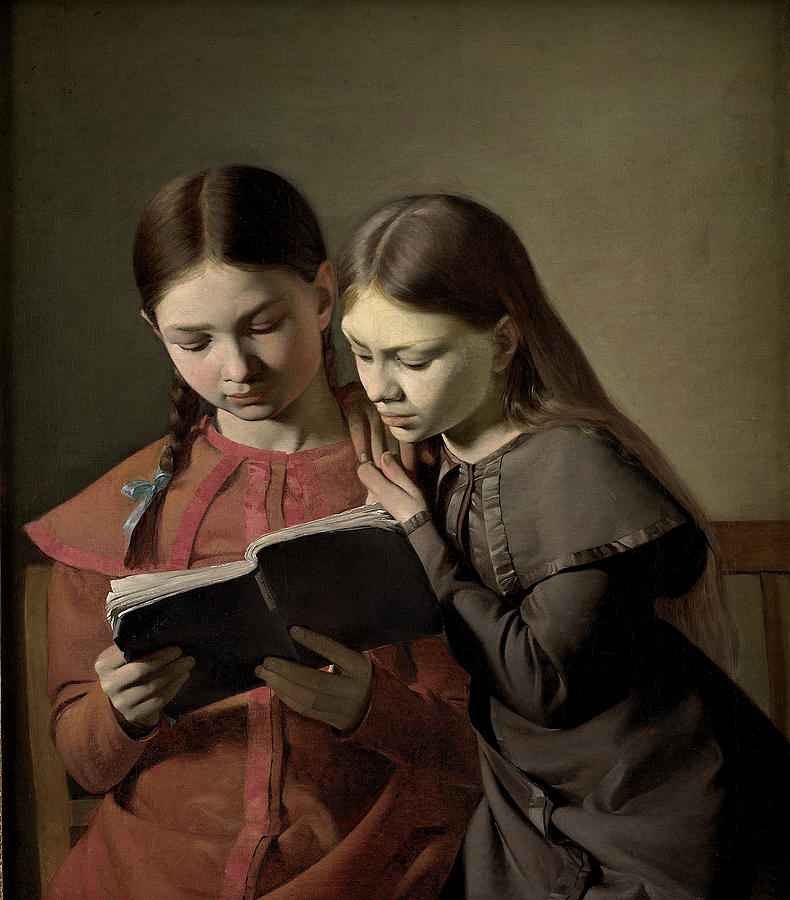

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

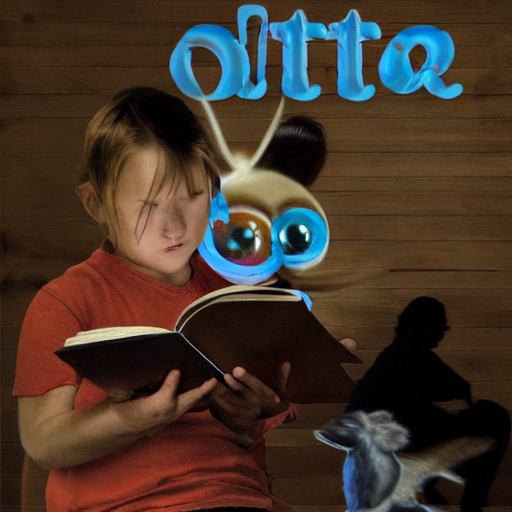

In [ ]:
#@title Visualise the protagonist's confrontation with the antagonist happen. (Running this will take a while; especially the first time).

#@markdown If `USE_DEFAULT_IMAGE` is unchecked, you'll be prompted to upload an image when you run the cell.

PROMPT = 'Monster book attacks reader' #@param {type: 'string'}
USE_DEFAULT_IMAGE = False #@param {type: 'boolean'}

#@markdown Fine-tunable parameters here. You may edit these parameters for this exercise.
ROUNDS   = 50   #@param {type: 'integer'}
STRENGTH = 0.65 #@param {type:"slider", min:0, max:1, step:0.01}
GUIDANCE_SCALE = 7 #@param {type: 'integer'}
HEIGHT   = 512  #@param {type: 'integer'}
WIDTH    = 512  #@param {type: 'integer'}

#@markdown Click the run button to the left to start! Or, double-click the cell to see the code.

if USE_DEFAULT_IMAGE:
    print('Downloading default image...')
    !curl -L "https://raw.githubusercontent.com/pkage/ai-storytelling-backstage/main/imgs/sickle.png" -o sickle.png
    filename = 'sickle.png'
else:
    all_files = files.upload()
    filename = list(all_files.keys())[0]

init_image = Image.open(filename)
display(init_image)

output_image = image.stable_diffusion_img2img(
    init_image,
    PROMPT,
    rounds=ROUNDS,
    strength=STRENGTH,
    guidance_scale=GUIDANCE_SCALE,
    dims=(WIDTH,HEIGHT),
    seed=SEED
)

# cleanup

os.remove(filename)


display(output_image)

Upload an image:


Saving AriAttackedByMonster.png to AriAttackedByMonster (1).png


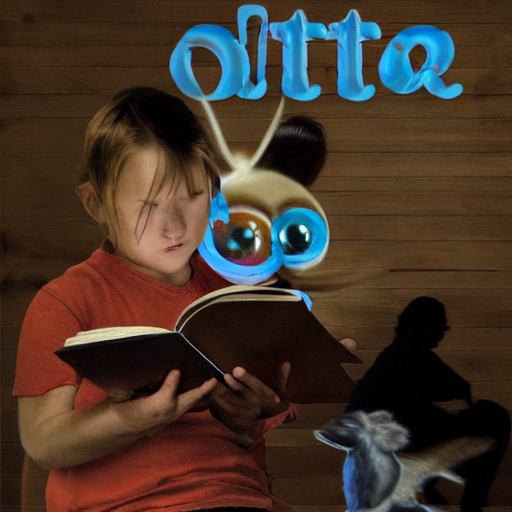

Sample 1:

> a boy reading a book while holding a stuffed animal



In [ ]:
#@title Have an AI describe what is happening by captioning the resulting image. (You will need to right-click and save the outputted image from above and upload it here when prompted after running the cell).

#@markdown If `USE_DEFAULT_IMAGE` is unchecked, you'll be prompted to upload an image when you run the cell.
USE_DEFAULT_IMAGE = False #@param {type: 'boolean'}

#@markdown Click the run button to the left to start! Or, double-click the cell to see the code.

if USE_DEFAULT_IMAGE:
    print('Downloading default image...')
    !curl -L "https://raw.githubusercontent.com/pkage/ai-storytelling-backstage/main/imgs/caption.png" -o caption.png
    filename = 'caption.png'
else:
    print('Upload an image:')
    all_files = files.upload()
    filename = list(all_files.keys())[0]

init_image = Image.open(filename)
display(init_image)

captions = image.image_caption(
    init_image,
    max_length=MAX_LENGTH,
    num_beams=NUM_BEAMS,
    render=False
)

render_output_text(captions)

os.remove(filename)


Explanation: Describe the confontation between protagonist and antagonist briefly, drawing from the original and transformed images, and the generated caption. For a distinction, have the images and/or the caption work in sequence to create a description of the event taking place.

*Your answer here.*

Example explanation: Ari stared blankly into the book, and reached for the old stuffed rat. The thought of their late father (shadow) gnawed at the edge of their mind.

## Explanation - Wrapping up Act 2: Identify the Crisis from anywhere in Act 1's generated text or either of the images.

*Your answer here.*

Example explanation: *Ari is confronted with memories of their late father.*

# Arc 3 - Resolution [Synthesis]
[Marks 25/85]

Where our protagonist's journey comes to an end, and the crisis is resolved. How were they transformed? Were any lessons learnt? You will use a number of text-related AI tools to analyse the story so far. First you will select from your text so far (both your prompts and generated text) and compose a draft story. You will summarise this, ask any one question, and let the AI complete any one sentence. Then, you will draw from this to make a final statement on the resolution of the story.

In [ ]:
#@title Select any parts from the generated text and your explanation and paste them in any order to create a draft of the final story. The character limit is lifted for this cell (paste in as much or as little text as you want).

PROMPT = "Ari was creative (\"art perfect\", \"drew picture\"), helpful (narrator thanks them, asks about people), and handy (can craft things). never owned a book -> Is unable to invest to anything but art, because they need praise. Needs to develop internal motivation. Ari stared blankly into the book, and reached for the old stuffed rat. The thought of their late father (shadow) gnawed at the edge of their mind." #@param {type: 'string'}

#@markdown Click the run button to the left to start! Or, double-click the cell to see the code.

In [ ]:
#@title Summarise your story draft.

text.summarization(
    PROMPT,
    model=SUMM_MODEL,
    max_length=MAX_LENGTH,
    min_length=MIN_LENGTH,
    seed=SEED
)

#@markdown Click the run button to the left to start! Or, double-click the cell to see the code.

Sample 1:

> Ari was creative ("art perfect", "drew picture"), helpful (narrator thanks them, asks about people), and handy (can craft things). never owned a book. Is unable to invest to anything but art, because they need praise. Needs to develop internal motivation.



In [ ]:
#@title Answer any 1 question about your story (paste into the Context, either the Draft text or the Summary).
QUESTION = 'What was the moral of the story?' #@param {type: 'string'}
CONTEXT  = "Ari was creative (\"art perfect\", \"drew picture\"), helpful (narrator thanks them, asks about people), and handy (can craft things). never owned a book. Is unable to invest to anything but art, because they need praise. Needs to develop internal motivation." #@param {type: 'string'}

#@markdown Click the run button to the left to start! Or, double-click the cell to see the code.

text.question_answering(
    QUESTION,
    CONTEXT,
    model=QA_MODEL,
    seed=SEED
)

Answer: **helpful**

Score: `0.01112938579171896`  
Position: 50 to 57


In [ ]:
#@title Fill in the blanks. Use this find out what became of our protagonist at the resolution of the story.
#@markdown Edit the sentence so that it relates to your story, then use `[MASK]` to indicate where you would like the model to suggest words for you.
PROMPT = "After reading their first book, Ari went [MASK]."  #@param {type: 'string'}

text.mask_filling(
    PROMPT,
    model=FIB_MODEL,
    seed=SEED
)

#@markdown Click the run button to the left to start! Or, double-click the cell to see the code.

Sample 0 (49.80991184711456

> after reading their first book, ari went **<span style="color: blue;">home</span>**.

Sample 2 (12.370935082435608

> after reading their first book, ari went **<span style="color: blue;">on</span>**.

Sample 4 (2.549334615468979

> after reading their first book, ari went **<span style="color: blue;">crazy</span>**.

Sample 6 (2.4428794160485268

> after reading their first book, ari went **<span style="color: blue;">ahead</span>**.

Sample 8 (1.6006911173462868

> after reading their first book, ari went **<span style="color: blue;">wild</span>**.

## Explanation - Wrapping up Act 3 & Your Story: Select from the generated outputs in Act 3 and clarify how the story ended and how the protagonist was transformed.

*Your answer here.*

Example explanation: *Ari saw value in their willingness to help others, despite their own insecurity. Ari went home to confront their past.*

## **Exercise B - Programming a Story Generating AI**

[Marks 15/100]

It was 1973 when Prof. Sheldon Klein made the news by claiming their "Automatic Novel Writer" was able to "model human language and social behaviour as it evolved over time", being able to generate any story (with some tuning) [For more, see Story Machines; pages 46-48]. In overselling the significance of their work, as what we would today point out as an AI that could replace writers, Prof. Klein perhaps failed to appreciate his and his colleagues' work for what it was: an idea generator, and a study in the nature of stories.

The Automatic Novel Writer did not make use of Deep Learning or any form of Machine Learning (learning functions from data). It instead relied on far more transparent and explainable operations: a series of programmatic elements, such as loops and comparisons, and (pseudo)random choice.

## Instructions:

Below you will find 2 options, of which you will pick one to do for the coursework. If both are attempted, then only Option 1 will be marked.

Each of these involves using some fundamental programming tools from which you will build a small story generating program. Examples of how these tools work are provided in the below cell, and each option has instructions for producing a first working prototype.

Getting the prototype working awards a passing mark 50% [Mark 8/15]. Customising the prototype by editing the displayed text an additional 15% for a mark of merit [Mark 10/15]. For a distinction, you will be expected to make use of the AI tools provided with the course to further adapt the program's output. A separate Code Cell titled "Advanced" is provided for the latter task. Start by copying your completed prototype in, then try to use any of the AI models used in Exercise A (or elsewhere in the course notebooks) to adapt how your program works. Creativity in using these, and managing to get them to work, will be considered for mark (not the creativity of the generated text itself, but how the tools were used).

In [ ]:
#@title ### Example Code using the tools for Exercise B (with some explanation in the comments starting with #):

import random # It is good practise to write import statements at the top, so people can see what extra libraries of code you are using. In this case, we need this library as it includes randint, which we will use to get a random integer number later below.

# For Checking the Value of a Variable
# - - Example if / else if / else statement:
test_variable = 1 # Set this variable to any number to see what happens. If you want, you can also set the value to a string/text such as "1" via test_variable = "1". Note how this behaves differently.
if test_variable == 1: # This checks to see if test_variable has the value 1...
  print("test_variable has value 1.") # ... and this is printed out if it does.
elif test_variable == 2: # If test_variable does not have the value 1 (and only then) this checks to see if test_variable has the value 2.
  print("test_variable has value 2.") # ... and this is printed out if it does.
else: # If all the previous checks came back False or, in other words, test_variable neither has the value 1 nor 2...
  print( "test_variable is neither 1 nor 2." ) # ... then this is printed out instead.

# For doing the same thing (maybe slightly differently each time) in a loop
# - - Example for loop:
for x in [1, 2, 3]: # This will set the value of x to 1, then print the statement below. It will then go back and set the value to 2, and then print the statement below. It keeps doing this until it has gone through all of the values in [1, 2, 3]. 
  print( "x is now " + str(x) + "." ) # Note how we are using str() to change the value of x to a string/text so it can be concatenated with the other text. If you want, see what happens when you replace str(x) with just x in the print statement.

# For getting an integer number at random (pseudo random; modern computers don't actually have true randomness)
# - - Example randint:
random_number = random.randint(1, 9) # This will assign to random_number an integer value between 1 and 9. You can change these number to suit your purpose.
print(random_number) # Note how we do not need to change the integer to a string/text in order to print it, as print() does this for us. We only needed it for concatenating non-string/text variables to other text.

# For getting input from the user
# - - Example input():
print("Please say something:")
inputted_text = input()
print("\n You said: '" + inputted_text + "'")  # \n adds a new line

test_variable has value 1.
x is now 1.
x is now 2.
x is now 3.
7
Please say something:
test

 You said: 'test'


In [ ]:
#@title ### Example Code using an AI model (Note that we have set render=False; This is so that we can store the output from the AI model in a variable, rather than printing it out):

#MODEL  = 'medium'
#SEED        = 0
#MAX_LENGTH  = 20
#NUM_RETURN_SEQUENCES = 2
RENDER_ExB = False
PROMPT = 'The windows rattled as we'

output = text.text_generation(
    PROMPT,
    model=MODEL,
    seed=SEED,
    max_length=20,
    num_return_sequences=2,
    render=RENDER_ExB
)

for x in range(2):
  print( "\n -" + str(x) + "-\n" + output[x])

# help(text)
# help(render_output_text)


 -0-
The windows rattled as we stepped out of the house and into the dining room. This was the bedroom

 -1-
The windows rattled as we came to our first stop. I saw what was apparently a red car next


### **Option 1**

For this option, imagine someone going through a "Haunted House" or a similar amusement park ride. The idea is that someone is moving progressively through a series of rooms, and something happens in each one. To keep things interesting, what happens in every room will be selected from the program.

For the prototype, this selection is random from a set of pre-written scripts.
*   We will use a "for loop" to "iterate" through the rooms by increasing the value of an integer we have named "room_number", starting from 1. If for example room_number = 2, this will indicate that this is the 2nd room visited.
*   We will use an "if statement" to check the value of a "variable", and then do something different depending on what the value is.
*   We will use "randomint" for randomly selecting an integer number to assign to a variable. 

For a distinction, you will be asked to explore some other way of selecting what happens in every room. Try using any of the AI tools from Exercise A to generate what happens in each room. For an extra challenge, make what happens in each room also depend on what has happened already in previous rooms.

In [ ]:
#@title ### Prototype:
# The comments below tell you what is required to complete the prototype.

import random

event_a = "Something interesting happened here!"
event_b = "Something interesting happened here too!"
event_c = "Something of mild significance happened here!"

# Walking through each room:
# (edit the range of values in the for loop so that 4 rooms are visited)
for room_number in [1]:
  print("What happened here?")
  # Use randint to get a number from 1 to 3
  # (replace the right side of the assignment statement below):
  random_number = 1
  # Select which event will happen using an if/elif statement to check the random number
  # (expand the statement below to include all 3 event options):
  if random_number == 1:
    print(event_a)

print("\n Finally we have escaped.")

What happened here?
Something interesting happened here!

 Finally we have escaped.


In [ ]:
#@title ### Advanced:
# Insert your code in this cell. It might be easier to start by pasting in your solution for the prototype, then see how you can replace what happens in each room using the AI tools from Exercise 1.

### **Option 2**

For this option, imagine calling an automated storyteller. Your call is answered by an answering machine which waits for you to dial a number. It then responds based on your input and keeps waiting for your responses until you dial to end the call.

For the prototype, there is a predetermined set of recordings you can choose from.
*   We will use a "while loop" to "iterate" through each dial press. This loop only ends when you a certain condition is met, which for the prototype we will set as dialling number 3.
*   We will use an "if statement" to check the value of a "variable", and then do something different depending on what the value is.
*   We will use "input" for letting the user write something for the program to read.

For a distinction, you will be asked to explore some other way of selecting what happens when you dial a number. Try using any of the AI tools from Exercise A to generate what happens each time. For an extra challenge, make what happens at each dial also depend on what has happened already.

In [ ]:
#@title ### Prototype:
# The comments below tell you what is required to complete the prototype.
recording_1 = "Youd dialed 1. Once upon a time..."
recording_2 = "Youd dialed 2. This is a story about stories..."
recording_3 = "Youd dialed 3. Ending Call."

call_active = True
print("Hello.")
while call_active:
  print("Please dial a number on your device...")
  # Use input() to get a number from 1 to 3
  # (replace the right side of the assignment statement below):
  dialed_number = 1
  # Select which event will happen using an if/elif statement to check the number inputted
  # (expand the statement below to include all 3 options):
  if dialed_number == 1:
    print(recording_1)
  elif dialed_number == 2:
    print(recording_2)
  
  # Move the line below into your if/elif statement so that it only happens when 3 is dialled.
  call_active = False

print("\n  Thank you for you call. [END]")

Hello.
Please dial a number on your device...
Youd dialed 1. Once upon a time...

  Thank you for you call. [END]


In [ ]:
#@title ### Advanced:
# Insert your code in this cell. It might be easier to start by pasting in your solution for the prototype, then see how you can replace what happens in each room using the AI tools from Exercise 1.